In [1]:
import torch
import gpytorch
import numpy as np
import pandas as pd

from bo_functions import ExactGPModel
from bo_functions import test_train_split
from bo_functions import bo_iter
from bo_functions import bo_iter_w_restarts


import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Set Parameters
Theta_True = np.array([1,-1])
BO_iters = 100
train_iter = 300
noise_std = 0.1
restarts = 15

emulator = False
sparse_grid = False
verbose = False

shuffle_seed = 6
set_lengthscale = None
# set_lengthscale = 0.5
t=4

# explore_bias = torch.tensor([0,0.1,0.5])
explore_bias = torch.tensor([0.75])

#Pull Experimental data from CSV
exp_data_doc = 'CSVs/Exp_Data/n=5.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(0.5,1.5,p) #1x10
Theta2 =  np.linspace(-1.5,-0.5,p) #1x10
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays
theta1_mesh = theta_mesh[0]
theta2_mesh = theta_mesh[1]

Explore Bias: tensor(0.7500)
Restart Number:  1


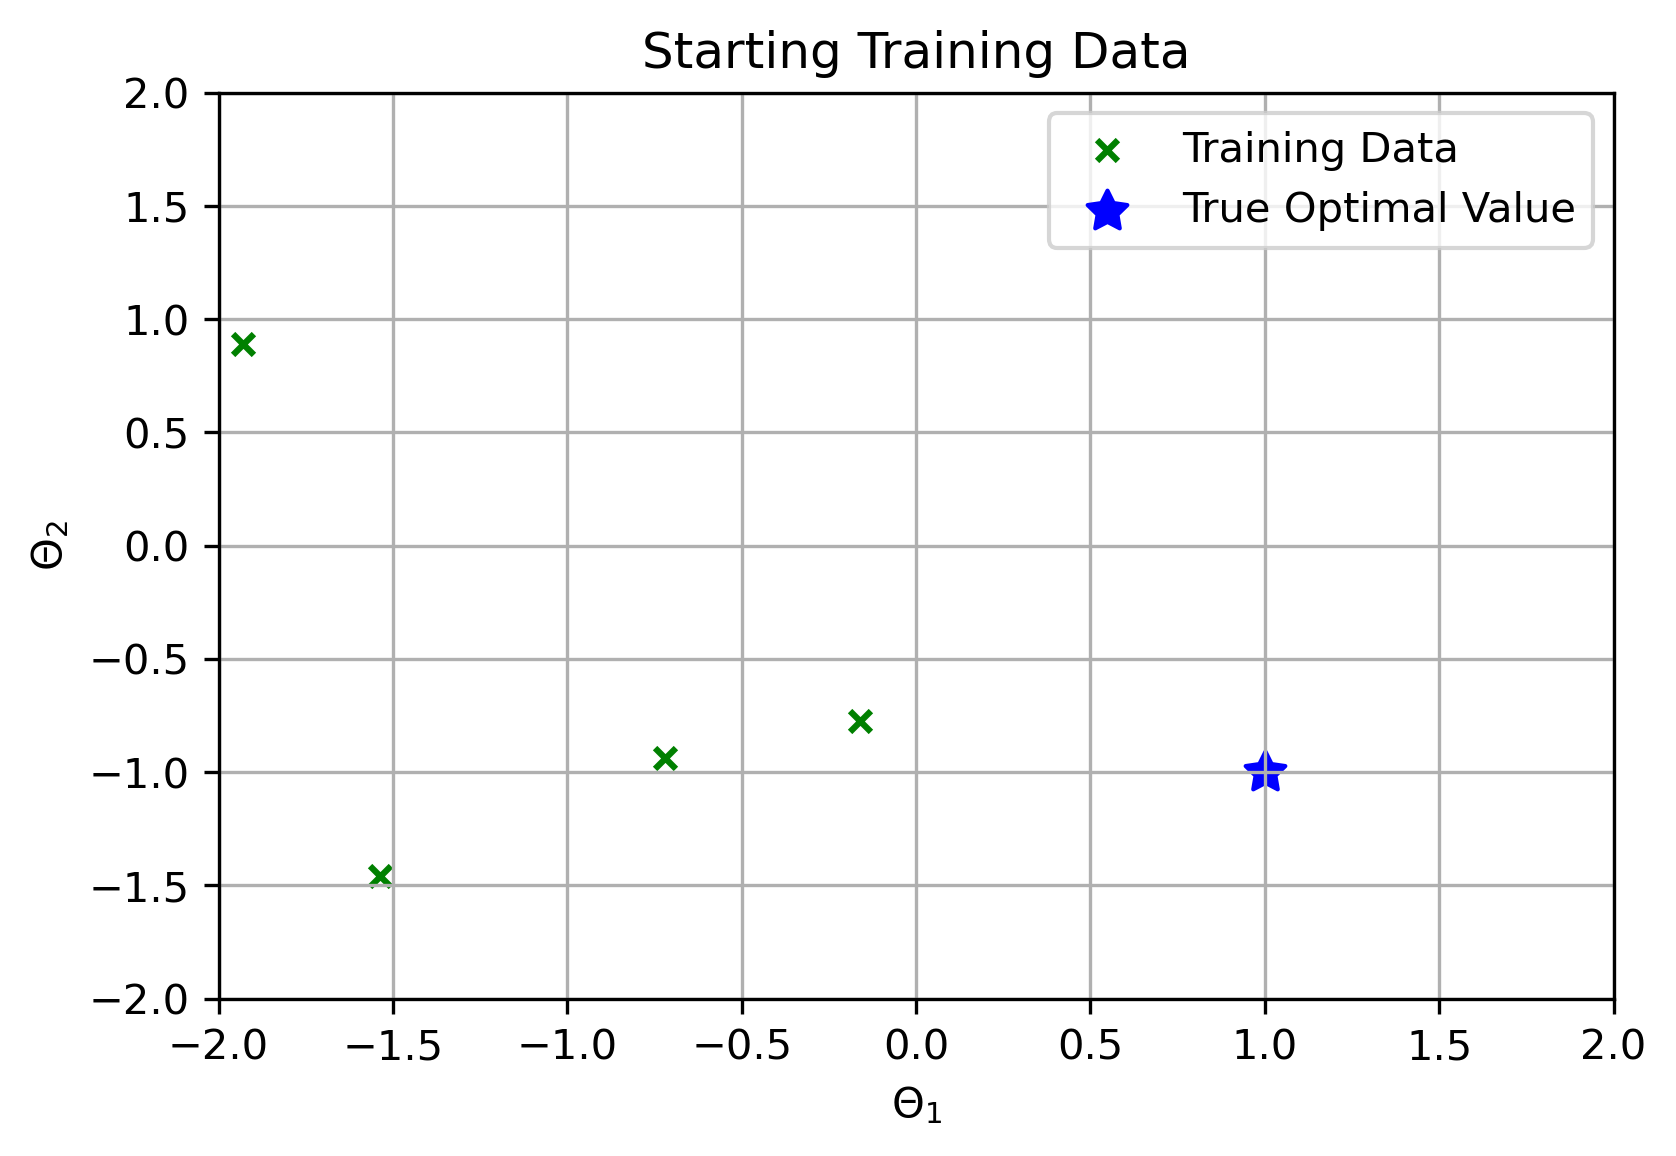

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/gpytorch/lazy/triangular_lazy_tensor.py:130: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  res = torch.triangular_solve(right_tensor, self.evaluate(), upper=self.upper).solution


Restart Number:  2


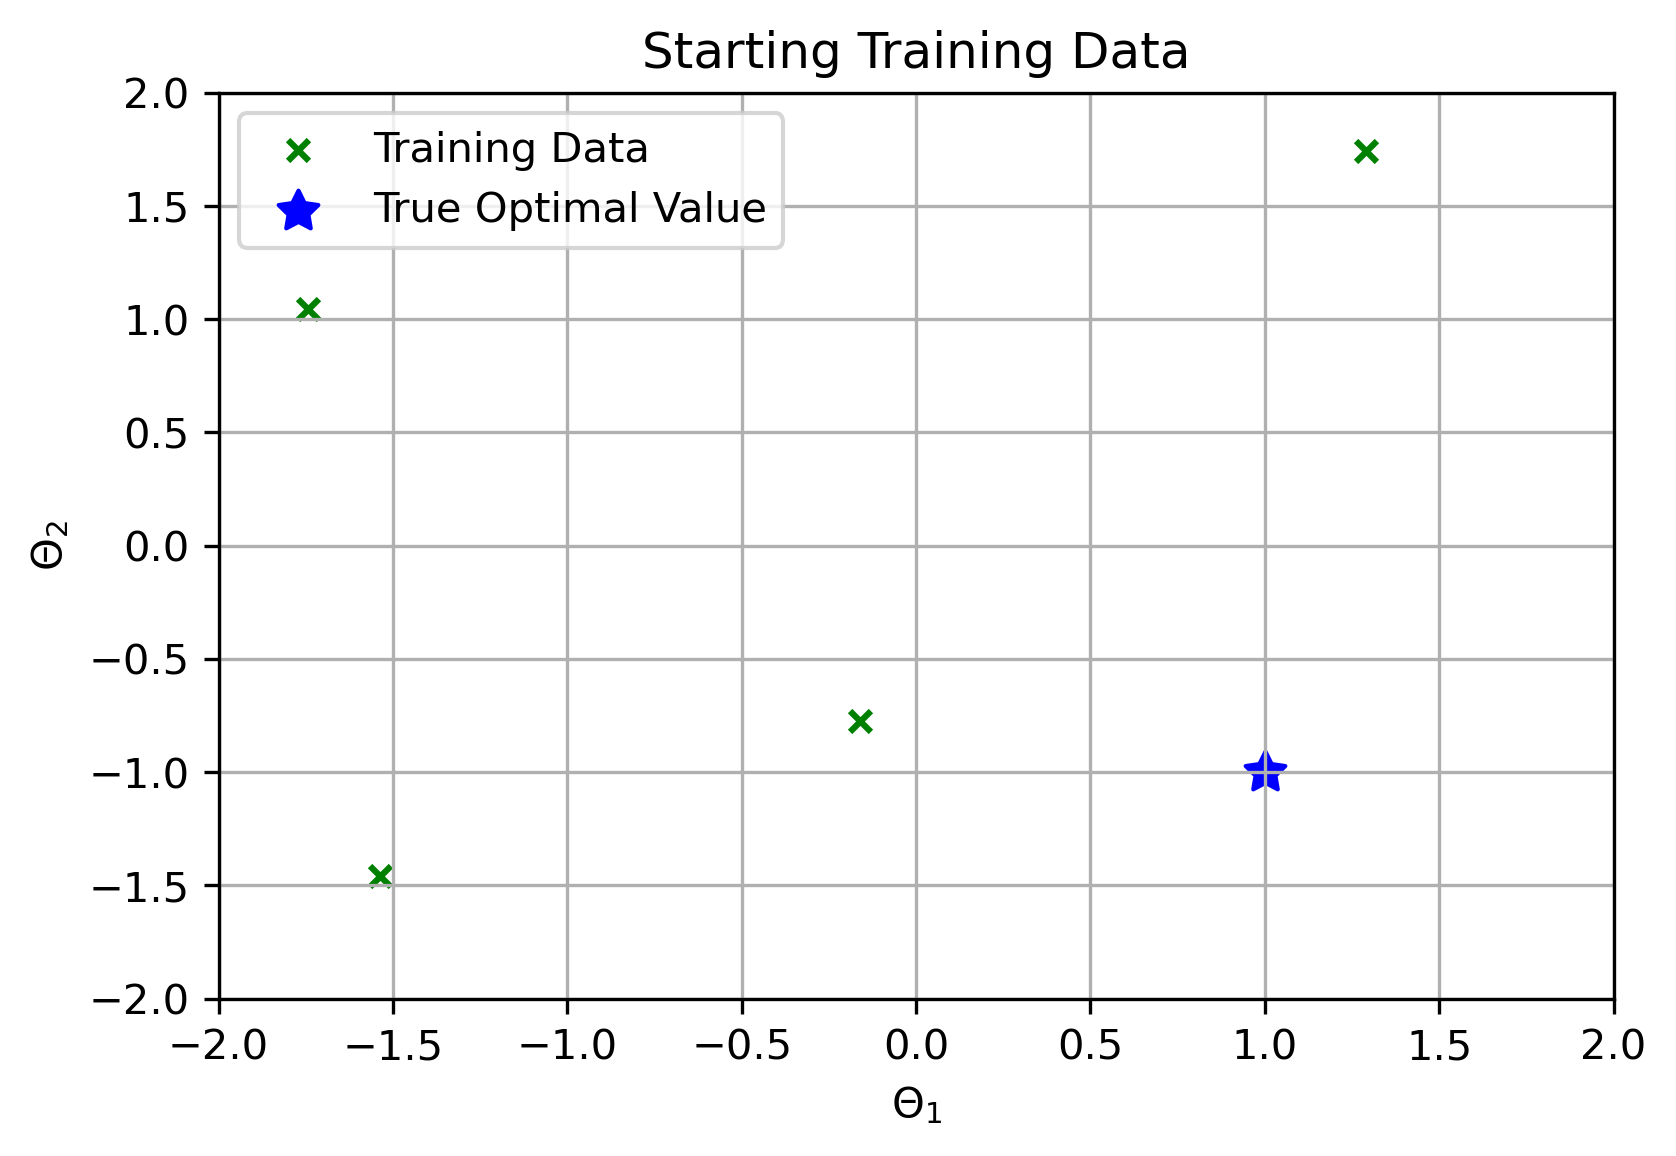

Restart Number:  3


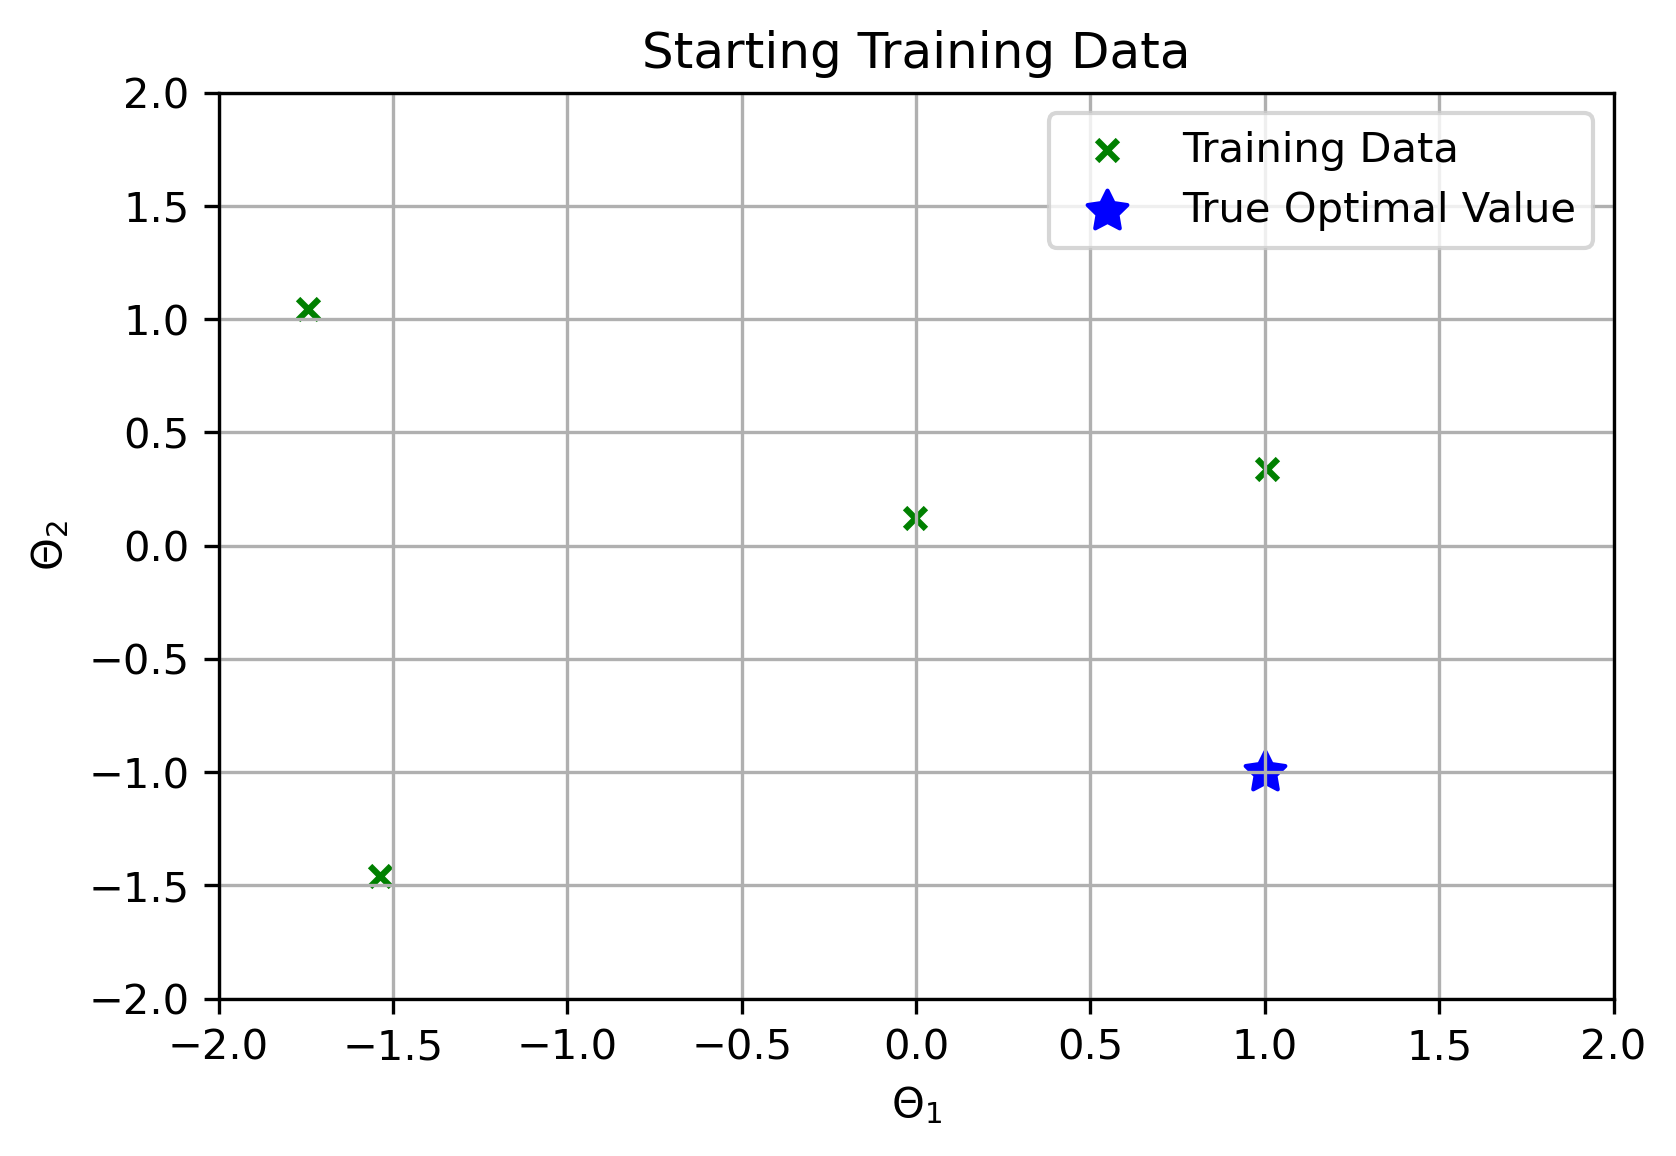

Restart Number:  4


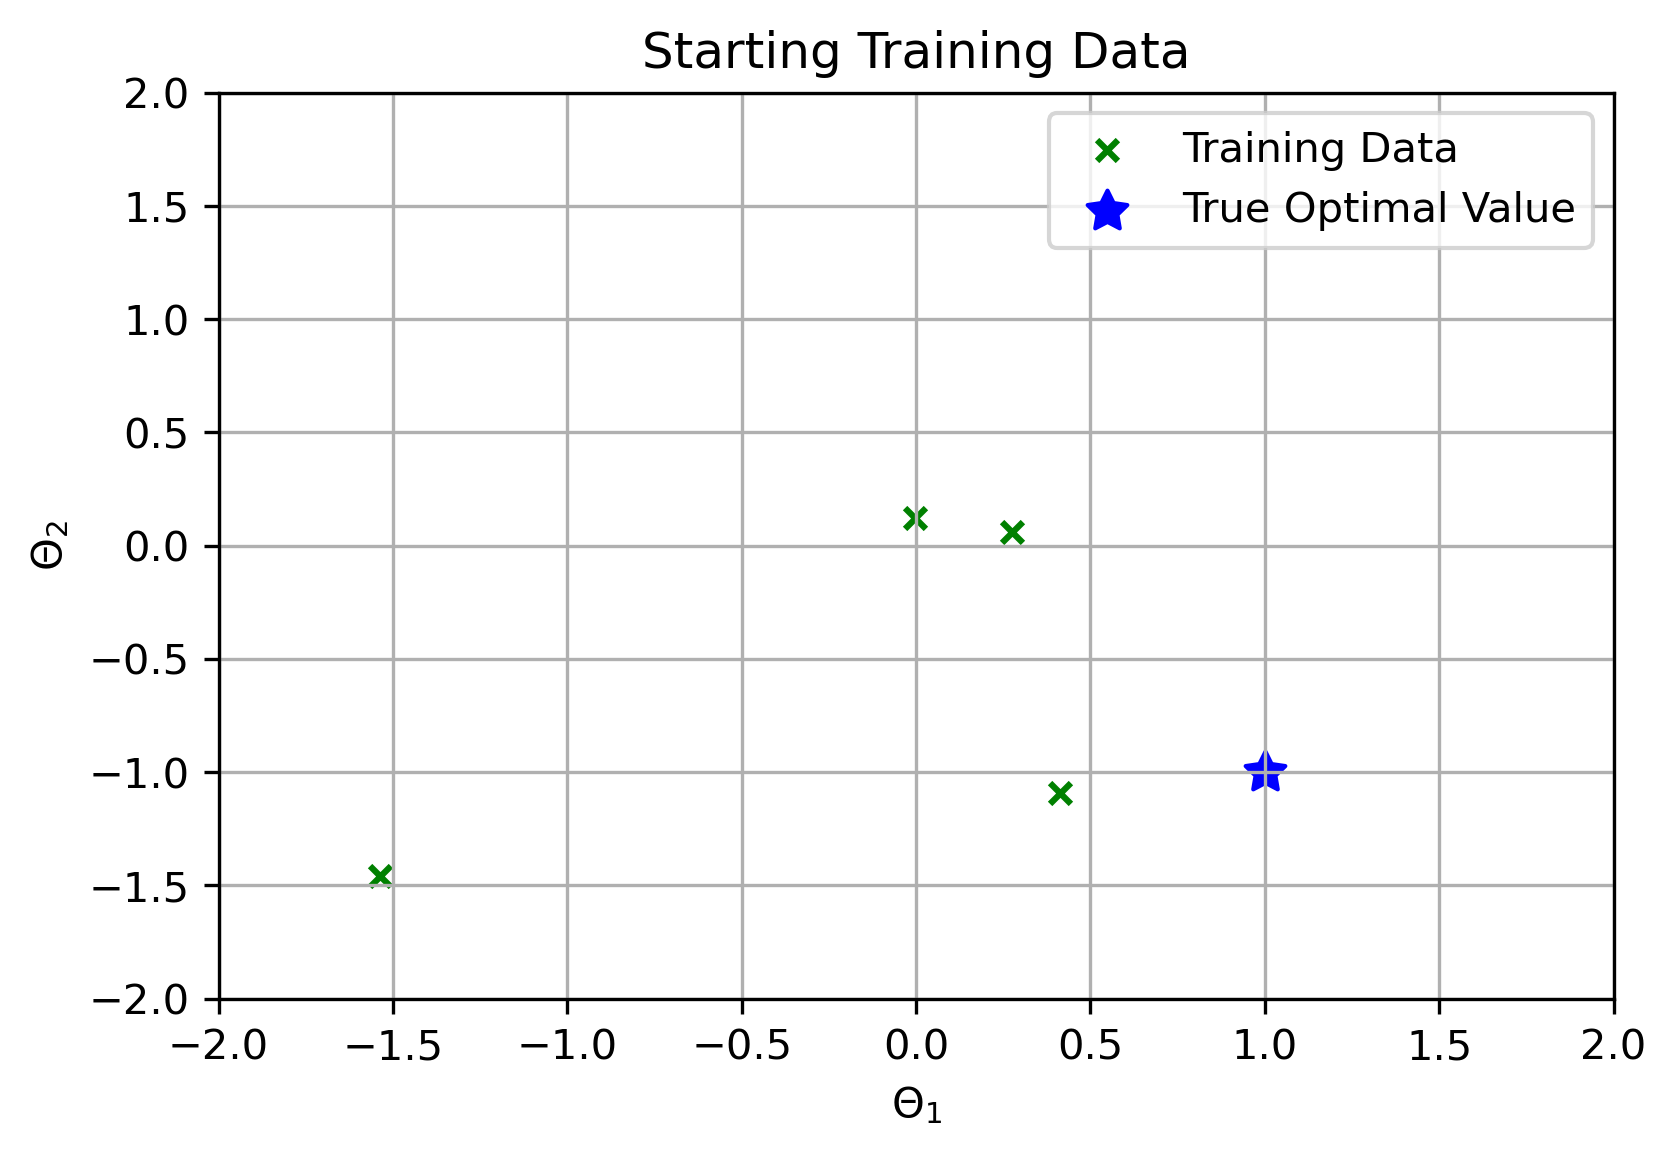

In [ ]:
save_fig=True
obj = "LN_obj"        

all_data_doc = "CSVs/Train_Data/all_2_ln_obj_data/t=25.csv"
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=","))   

for i in range(len(explore_bias)):
    print("Explore Bias:", explore_bias[i])
    results = bo_iter_w_restarts(BO_iters,all_data_doc,t,theta_mesh,Theta_True,train_iter,explore_bias[i], Xexp, Yexp,
                                 noise_std, obj, restarts, sparse_grid, emulator, set_lengthscale, verbose,save_fig, 
                                 shuffle_seed)
    print("The GP predicts that the lowest SSE of", "{:.3e}".format(results[2]), "occurs at \u03B8 =", results[1][0], "during restart", results[0])